## <center><b>Simple Linear Regression_1</b></center>

<div class="alert alert-block alert-success">
<b>Input(X)[Predictor]: </b> One Feature(Column) Independent Feature<br>
<b>Output(Y)[That predict value of y]: </b> One Feature(Column) dependent Feature<br>
<b>Follow: </b> Linearity Relationship btn Input v/s Output<br>   
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('placement.csv')
df.head(6)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

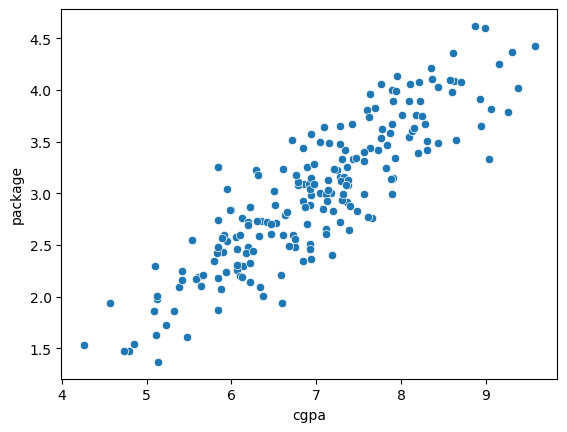

In [6]:
sns.scatterplot(x = 'cgpa',y = 'package',data = df )
plt.show()

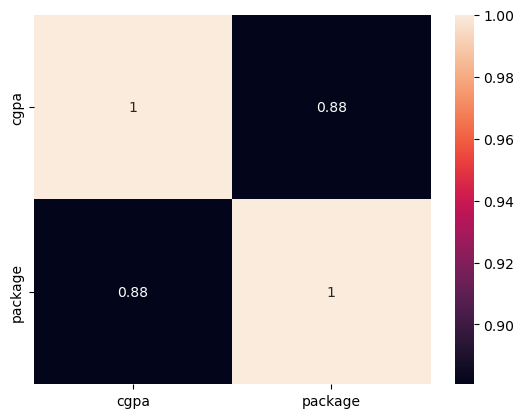

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## LR_Model Building

In [9]:
x = df[['cgpa']]
y = df[['package']]

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.7689935181285936

In [14]:
pipe = Pipeline([('LR',lr)])
kfold = KFold(n_splits=5,random_state=43,shuffle=True)

gcv = GridSearchCV(pipe,param_grid={'LR__n_jobs':[None]},cv=kfold,verbose=2)
gcv.fit(x,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................................LR__n_jobs=None; total time=   0.0s
[CV] END ....................................LR__n_jobs=None; total time=   0.0s
[CV] END ....................................LR__n_jobs=None; total time=   0.0s
[CV] END ....................................LR__n_jobs=None; total time=   0.0s
[CV] END ....................................LR__n_jobs=None; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=43, shuffle=True),
             estimator=Pipeline(steps=[('LR', LinearRegression())]),
             param_grid={'LR__n_jobs': [None]}, verbose=2)

In [15]:
gcv.best_score_

0.7697492731337043